## 4. Problema de valor inicial y campo de direcciones

Considere el siguiente problema de valor inicial:

$$
\frac{dy}{dx} = \frac{x - 3y - 3(x^2 - y^2) + 3xy}{2x - y + 3(x^2 - y^2) + 2xy}, \quad y(1.5) = 0. \tag{3}
$$

### a) 
Graficar el campo de direcciones de la EDO anterior.

### b) 
A partir del campo de direcciones, esbozar la solución del problema de valor inicial (3), y agregar la curva solución al plot del campo de direcciones.

### c) 
Hallar numéricamente los puntos de equilibrio de la EDO anterior, que son aquellos puntos en donde el campo de direcciones $F(x, y) = 0$ es el vector nulo. Para ello, es necesario resolver numéricamente el sistema de ecuaciones:

$$
\begin{aligned}
x - 3y - 3(x^2 - y^2) + 3xy &= 0, \\
2x - y + 3(x^2 - y^2) + 2xy &= 0.
\end{aligned}
$$

Resultados de búsqueda de puntos de equilibrio:

Condición inicial (0, 0)  ->  Punto de equilibrio (np.float64(0.0), np.float64(0.0))
Condición inicial (1, 1)  ->  Punto de equilibrio (np.float64(0.412478), np.float64(0.638639))
Condición inicial (1, -1)  ->  Punto de equilibrio (np.float64(1.386977), np.float64(-1.41775))
Condición inicial (-2, -2)  ->  Punto de equilibrio (np.float64(-0.466121), np.float64(-0.220889))


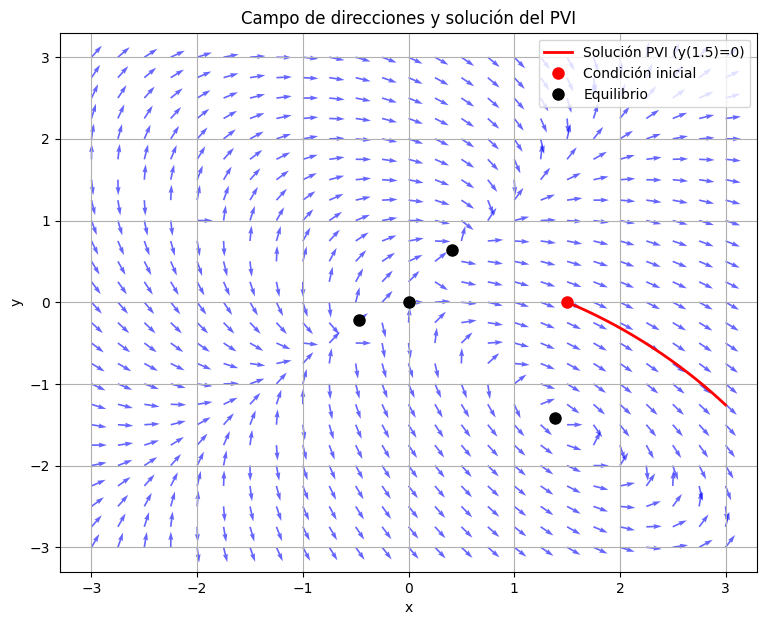


Lista final de puntos de equilibrio encontrados:
(np.float64(0.0), np.float64(0.0))
(np.float64(0.412478), np.float64(0.638639))
(np.float64(1.386977), np.float64(-1.41775))
(np.float64(-0.466121), np.float64(-0.220889))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Definimos la EDO
def dydx(x, y):
    num = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    den = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    # Evitar divisiones por cero
    return np.divide(num, den, out=np.zeros_like(num, dtype=float), where=den!=0)

# a) Campo de direcciones
X, Y = np.meshgrid(np.linspace(-3, 3, 25), np.linspace(-3, 3, 25))
U = np.ones_like(X)  # dx = 1
V = dydx(X, Y)       # dy = f(x,y)

# Normalizamos
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

plt.figure(figsize=(9,7))
plt.quiver(X, Y, U2, V2, angles="xy", color="blue", alpha=0.6)

# b) Resolver el PVI
x0, y0 = 1.5, 0
sol = solve_ivp(dydx, [1.5, 3], [0], dense_output=True, max_step=0.05)
x_vals = np.linspace(1.5, 3, 300)
y_vals = sol.sol(x_vals)[0]

plt.plot(x_vals, y_vals, 'r', linewidth=2, label="Solución PVI (y(1.5)=0)")
plt.plot(x0, y0, 'ro', markersize=8, label="Condición inicial") 

plt.title("Campo de direcciones y solución del PVI")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# c) Puntos de equilibrio 
def sistema(vars):
    x, y = vars
    f1 = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    f2 = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    return [f1, f2]

semillas = [(0,0), (1,1), (-1,1), (1,-1), (2,0), (0,2), (-2,-2), (2,2)]
equilibrios = []

print("Resultados de búsqueda de puntos de equilibrio:\n")
for s in semillas:
    sol = fsolve(sistema, s)
    punto = tuple(np.round(sol, 6))
    if punto not in equilibrios:
        equilibrios.append(punto)
        print(f"Condición inicial {s}  ->  Punto de equilibrio {punto}")
        # puntos de equilibrio en la gráfica
        plt.plot(punto[0], punto[1], 'ko', markersize=8, label="Equilibrio" if len(equilibrios)==1 else "")

plt.legend()
plt.show()

print("\nLista final de puntos de equilibrio encontrados:")
for p in equilibrios:
    print(p)


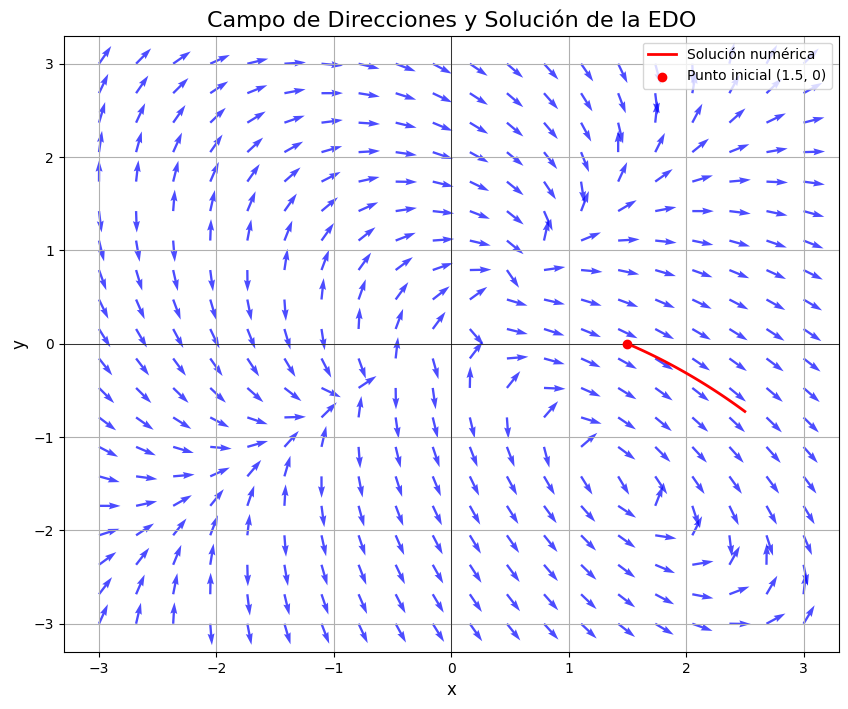

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir la función F(x, y) de la EDO
def f(x, y):
    numerador = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    denominador = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    return numerador / denominador

# Crear una malla de puntos para el campo de direcciones
x_vals = np.linspace(-3, 3, 20)
y_vals = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular las pendientes (dy/dx) en cada punto de la malla
slopes = f(X, Y)

# Para usar plt.quiver, necesitamos vectores (u, v)
# donde v/u = slope. Podemos tomar u=1, v=slope para simplificar.
# Normalizamos los vectores para que todos tengan la misma longitud.
u = np.ones(X.shape)
v = slopes
norm = np.sqrt(u**2 + v**2)
u = u / norm
v = v / norm

# Graficar el campo de direcciones
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, u, v, color='blue', alpha=0.7)

# Definir la EDO para solve_ivp
def ode_system(x, y):
    return f(x, y)

# Puntos de la solución numérica
x0 = 1.5
y0 = 0
x_span = [x0, 2.5]  # Intervalo de integración
x_eval = np.linspace(x_span[0], x_span[1], 100)

# Resolver el problema de valor inicial
sol = solve_ivp(ode_system, x_span, [y0], t_eval=x_eval)

# Graficar la curva solución
plt.plot(sol.t, sol.y[0], 'r-', label='Solución numérica', linewidth=2)
plt.scatter(x0, y0, color='red', zorder=5, label=f'Punto inicial ({x0}, {y0})')

plt.title('Campo de Direcciones y Solución de la EDO', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [6]:
from scipy.optimize import fsolve

# Definir el sistema de ecuaciones como una función que toma un array [x, y]
def equations(vars):
    x, y = vars
    eq1 = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    eq2 = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    return [eq1, eq2]

# Probar con diferentes estimaciones iniciales para encontrar las soluciones
initial_guesses = [
    (0, 0),    # Cerca del origen
    (1, 1),    # Otro punto
    (-1, 0),
    (0, -1)
]

print("Puntos de equilibrio (encontrados numéricamente):")
for guess in initial_guesses:
    try:
        solution = fsolve(equations, guess)
        x_eq, y_eq = solution
        if np.isclose(equations([x_eq, y_eq]), [0, 0]).all():
            print(f"Punto de equilibrio encontrado cerca de {guess}: ({x_eq:.4f}, {y_eq:.4f})")
    except Exception as e:
        print(f"No se pudo encontrar una solución cerca de {guess}: {e}")

Puntos de equilibrio (encontrados numéricamente):
Punto de equilibrio encontrado cerca de (0, 0): (0.0000, 0.0000)
Punto de equilibrio encontrado cerca de (1, 1): (0.4125, 0.6386)
Punto de equilibrio encontrado cerca de (-1, 0): (-0.4661, -0.2209)
Punto de equilibrio encontrado cerca de (0, -1): (1.3870, -1.4177)


## 5. Modelo de población animal

Considere una población de una especie de animales $P(t)$ que se modela por la ecuación diferencial:

$$
\frac{dP}{dt} = 0.0004P^2 - 0.06P. \tag{4}
$$

Suponga que la escala de tiempo $t$ se mide en semanas, mientras que la escala de la población $P$ se mide en individuos (número de individuos).

### a)
Determinar las dimensionales correctas de los parámetros $0.0004$ y $0.06$.

### b)
Hacer un análisis de los puntos de equilibrio de la EDO (4), y clasificarlos de acuerdo a si son estables, inestables o semi-estables.

### c)
Derivado del análisis anterior, hacer un esbozo de las soluciones $P(t)$, indicando la región donde dichas soluciones son constantes, crecientes o decrecientes, y las regiones donde las soluciones $P(t)$ tienen concavidad positiva, negativa o tiene máximos o mínimos.

### d)
Suponga que la población en el tiempo $t = 0$ es $P(0) = 200$ individuos. Describir cuál será el comportamiento a futuro de $P(t)$ si la población se rige por el modelo (4).

### e)
Repetir el análisis cualitativo en (d) asumiendo que la población en el tiempo $t = 0$ es $P(0) = 100$ individuos.

### f)
Resolver EDO (4) y graficar las curvas solución de los problemas en (d) y (e), para mostrar en la gráfica que la solución coincide con la descripción de su análisis cualitativo.